# 1. Importation des packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,mean_squared_error, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# 2. Chargement des données

In [2]:
import zipfile
import os

# Define the path to the uploaded zip file and the extraction directory
zip_path = "breast+cancer+wisconsin+diagnostic.zip"
extraction_path = "data/breast_cancer_dataset"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the files in the extracted directory to find the dataset file
extracted_files = os.listdir(extraction_path)
extracted_files

['wdbc.data', 'wdbc.names']

# 3. Analyse des données

In [3]:
# Définir les noms des colonnes selon la documentation du dataset
columns = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean",
    "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se",
    "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"
]

# Charger les données dans un DataFrame
data_path = os.path.join(extraction_path, "wdbc.data")
df = pd.read_csv(data_path, header=None, names=columns)

In [4]:
# Afficher les premières lignes du dataset
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

# 4. Prétraitement des données

In [6]:
# Convertir les étiquettes : M (malin) -> 1, B (bénin) -> 0
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

In [7]:
# Supprimer la colonne ID
df = df.drop(columns=['ID'])
df

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 5. Division des données (Train et test)

In [8]:
# Séparer les caractéristiques et la cible
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

In [9]:
# Diviser les données en ensembles d'entraînement et de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Entrainement des modèles classiques de ML

In [11]:
# Liste des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
}
# Dictionnaire pour stocker les scores
scores = {}

# 7. Evaluation et affichages des performances

In [12]:
# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
    scores[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Mean-squared-error": mean_squared_error(y_test, y_pred)
    }

In [13]:
# Afficher les scores sous forme de DataFrame
scores_df = pd.DataFrame({name: {metric: scores[name][metric] for metric in ["Accuracy", "Precision", "Recall", "F1 Score", "Mean-squared-error" ]} for name in scores}).T
scores_df

,Accuracy,Precision,Recall,F1 Score,Mean-squared-error
Logistic Regression,0.973684,0.976190,0.953488,0.964706,0.026316
KNN,0.947368,0.930233,0.930233,0.930233,0.052632
Decision Tree,0.947368,0.930233,0.930233,0.930233,0.052632
Random Forest,0.964912,0.975610,0.930233,0.952381,0.035088
SVM,0.982456,1.000000,0.953488,0.976190,0.017544


# 8. Construction d'un Shallow Neural Network

In [14]:
model_dnn = Sequential([
    Dense(30, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # 1 couche cachée de 30 neurones
    Dense(1, activation='sigmoid')  # Sortie binaire
])

model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.summary()

C:\Users\User\anaconda3\envs\bac4IA_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Entraînement
history = model_dnn.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4305 - loss: 0.7525 - val_accuracy: 0.7609 - val_loss: 0.5756
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8642 - loss: 0.4501 - val_accuracy: 0.8261 - val_loss: 0.3819
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9174 - loss: 0.3051 - val_accuracy: 0.8913 - val_loss: 0.2838
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9297 - loss: 0.2495 - val_accuracy: 0.9130 - val_loss: 0.2329
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9471 - loss: 0.1819 - val_accuracy: 0.9348 - val_loss: 0.2029
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9593 - loss: 0.1651 - val_accuracy: 0.9348 - val_loss: 0.1820
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9601 - loss: 0.1541 - val_accuracy: 0.9348 - val_loss: 0.1687
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9798 - loss: 0.1190 - val_accuracy: 0.9130 - val_los

# 9. Evaluation du modèle et Affichage des performances

In [16]:
y_pred_proba = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_proba >= 0.5).astype(int)

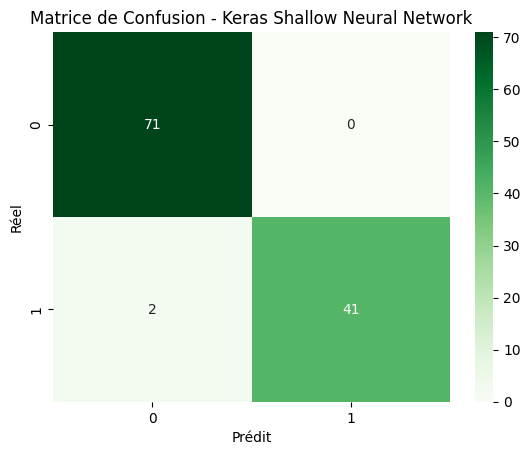

In [17]:
# Matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.title("Matrice de Confusion - Keras Shallow Neural Network")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

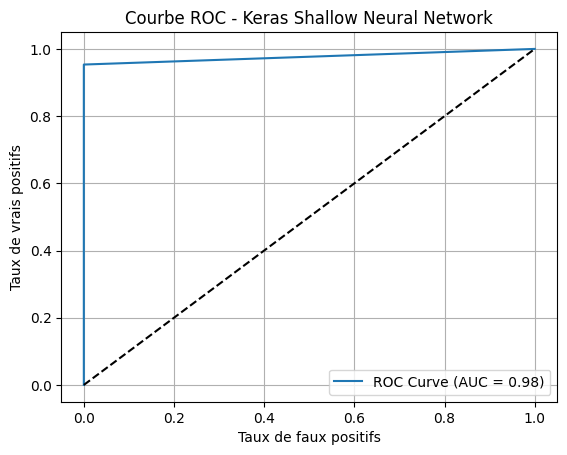

In [18]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - Keras Shallow Neural Network")
plt.legend()
plt.grid(True)
plt.show()

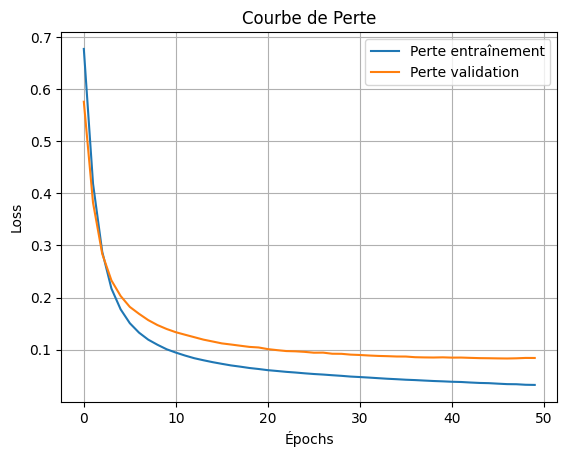

In [19]:
# Courbe de perte et de précision
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title("Courbe de Perte")
plt.xlabel("Épochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

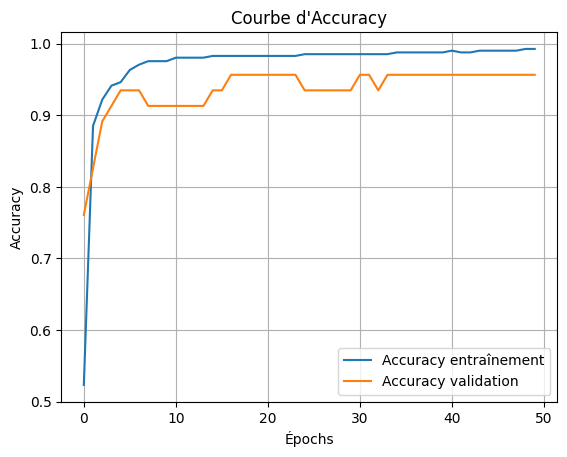

In [20]:
plt.plot(history.history['accuracy'], label='Accuracy entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.title("Courbe d'Accuracy")
plt.xlabel("Épochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 10. Simple prédiction

In [21]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred2 = svm_model.predict(X_test)

In [22]:
example_index = np.random.randint(0, len(X_test))
example_data = X_test.iloc[example_index].values.reshape(1, -1)

In [23]:
predicted_class = svm_model.predict(example_data)
actual_class = y_test.iloc[example_index]

C:\Users\User\anaconda3\envs\bac4IA_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [24]:
print(f'Example data: {example_data}')
print(f'Actual class: {actual_class}')
print(f'Predicted class: {predicted_class}')

Example data: [[1.462e+01 2.402e+01 9.457e+01 6.627e+02 8.974e-02 8.606e-02 3.102e-02
  2.957e-02 1.685e-01 5.866e-02 3.721e-01 1.111e+00 2.279e+00 3.376e+01
  4.868e-03 1.818e-02 1.121e-02 8.606e-03 2.085e-02 2.893e-03 1.611e+01
  2.911e+01 1.029e+02 8.037e+02 1.115e-01 1.766e-01 9.189e-02 6.946e-02
  2.522e-01 7.246e-02]]
Actual class: 0
Predicted class: [0]
